#Import all the library which we will use

In [577]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB

In [539]:
# load the datasets
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [540]:
#finding the null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

le = LabelEncoder()
data = data.apply(le.fit_transform)

In [541]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [542]:
data.info() # checking null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

TotalCharges show object values so we will convert them into numeric values.

In [543]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [545]:
data[data['TotalCharges'].isna()==True] = 0


We will replace object variable into numeric.

In [546]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)


In [547]:
data.drop(["customerID"],axis=1,inplace=True) # removed unused column

In [548]:
x =data.iloc[0:,0:-1] # storing the value
y = data['Churn']

In [549]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
dtypes: float64(2), int64(17)
memory usage: 1.0 MB


Data Visualization

C:\Users\honey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


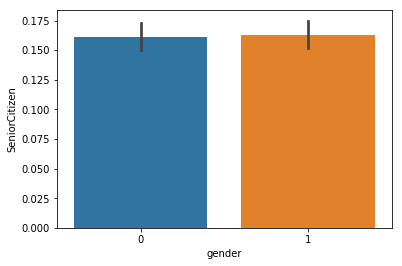

In [550]:
sns.barplot(x = 'gender', y = 'SeniorCitizen',data = data)

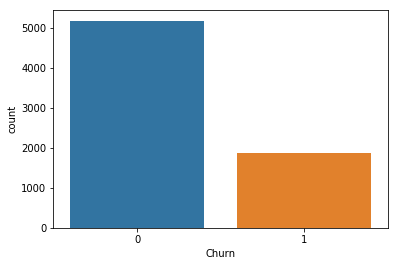

In [551]:
sns.countplot(data.Churn,data = data)

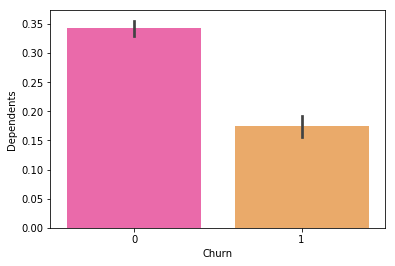

In [552]:
sns.barplot(x=data.Churn,y =data.Dependents, data = data,palette='spring')

In [553]:
#Churn vs Tenure: As we can see form the below plot, 
#the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

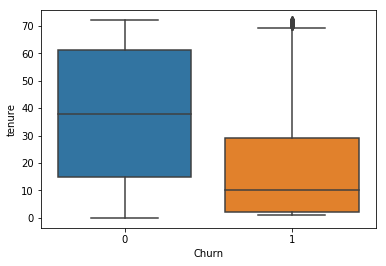

In [554]:
sns.boxplot(x = data.Churn, y = data.tenure)

In [555]:
# Scaling the data 
scale = StandardScaler()
data = scale.fit_transform(x)

C:\Users\honey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Now trained the model 

In [556]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

used different algorthim.

In [557]:
det = DecisionTreeClassifier()
det.fit(x_train,y_train)
d = det.predict(x_test)
print(accuracy_score(y_test,d))
print(confusion_matrix(y_test,d))
print(classification_report(y_test,d))

0.7296990346394094
[[1048  234]
 [ 242  237]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1282
           1       0.50      0.49      0.50       479

   micro avg       0.73      0.73      0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761



In [558]:
# Roc and Auc graph representation and predict score as well

Text(0.5, 1.0, 'DecisionTreeClassifier')

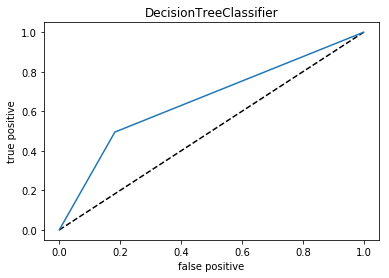

In [559]:
from sklearn.metrics import roc_curve
y_pred_prob = det.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('DecisionTreeClassifier')

In [560]:
from sklearn.metrics import roc_auc_score
det_auc_roc = roc_auc_score(y_test,y_pred_prob)
print(auc_roc)

0.7556426056624728


In [561]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print("acc score:",accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(y_test,pred))

acc score: 0.8131743327654741
[[1154  201]
 [ 128  278]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1282
           1       0.68      0.58      0.63       479

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.81      0.81      1761



C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [562]:
# Roc and Auc graph representation

Text(0.5, 1.0, 'logistic')

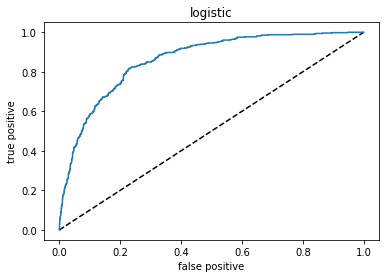

In [563]:
from sklearn.metrics import roc_curve
y_pred_prob = lg.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('logistic')

In [564]:
from sklearn.metrics import roc_auc_score
lg_auc_roc = roc_auc_score(y_test,y_pred_prob)
print(auc_roc)

0.7556426056624728


In [565]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
kn = knn.predict(x_test)
print(accuracy_score(kn,y_test))
print(confusion_matrix(y_test,kn))
print(classification_report(y_test,kn))

0.7700170357751278
[[1137  145]
 [ 260  219]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1282
           1       0.60      0.46      0.52       479

   micro avg       0.77      0.77      0.77      1761
   macro avg       0.71      0.67      0.68      1761
weighted avg       0.76      0.77      0.76      1761



Text(0.5, 1.0, 'KNN')

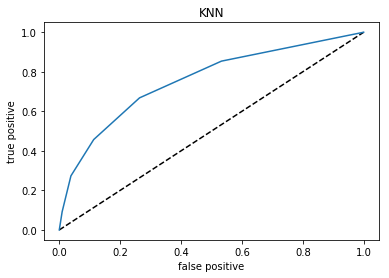

In [566]:
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('KNN')

In [567]:
from sklearn.metrics import roc_auc_score
kn_auc_roc = roc_auc_score(y_test,y_pred_prob)
print(auc_roc)

0.7556426056624728


In [568]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.771152754116979
[[991 291]
 [112 367]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1282
           1       0.56      0.77      0.65       479

   micro avg       0.77      0.77      0.77      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.81      0.77      0.78      1761



Text(0.5, 1.0, 'Gaussian')

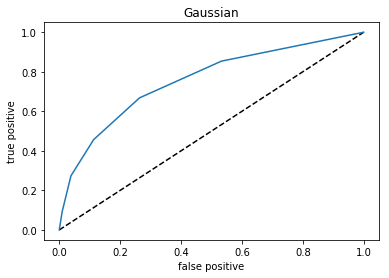

In [569]:
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('Gaussian')

In [570]:
from sklearn.metrics import roc_auc_score
gb_auc_roc = roc_auc_score(y_test,y_pred_prob)
print(auc_roc)

0.7556426056624728


In [571]:

randomForest = RandomForestClassifier()
randomForest.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))


0.771152754116979
[[991 291]
 [112 367]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1282
           1       0.56      0.77      0.65       479

   micro avg       0.77      0.77      0.77      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.81      0.77      0.78      1761



C:\Users\honey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Gaussian')

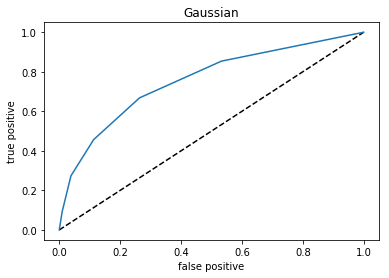

In [572]:
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('Gaussian')

In [573]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test,y_pred_prob)
print(auc_roc)

0.7556426056624728


Save the best model using pickle

In [574]:
import pickle
filename = "Logistic_roc_auc_curve"
fileobj = open(filename,'wb')
pickle.dump(lg_auc_roc,fileobj)
fileobj.close()

In [575]:
filename = "Logistic_roc_auc_curve"
fileobj = open(filename,'rb')
roc_auc = pickle.load(fileobj)
fileobj.close()

In [576]:
print(roc_auc)

0.8603752292054105
